In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
import os
import pandas as pd
import utils

In [7]:
filename = './data/NON/CSS071101:015607+203404.fits'

In [8]:
data, h = fitsio.read(filename, header=True)
print(h)


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                    4 / width of table in bytes
NAXIS2  =                   70 / number of rows in table
PCOUNT  =                    0 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                    1 / number of fields in each row
TTYPE1  = 'HDU_Ext '           / label for field   1
TFORM1  = '4A      '           / data format of field: ASCII Character
CRTS_ID = 'CSS071101:015607+203404'
N_IMAGES=                   70
HIERARCH RA_(J2000) = 29.0391977047426
HIERARCH DEC_(J2000) = 20.5413696523704
IMG_REF = '01_05APR21_N21084_0001_cutout_0205.fits'


In [10]:
CRTS_ID = h['CRTS_ID']
RA = h['RA_(J2000)']
Dec = h['Dec_(J2000)']

print(CRTS_ID,RA,Dec)

CSS071101:015607+203404 29.0391977047426 20.5413696523704


In [11]:
data = fitsio.read(filename, ext=1)
# df = pd.DataFrame(data, columns=['HDU_Ext','Sequence','Date','MJD','Field_ID','Obs_In_Seq','Cutout'], dtype=str)
# df

array([(b'2   ',), (b'3   ',), (b'4   ',), (b'5   ',), (b'6   ',),
       (b'7   ',), (b'8   ',), (b'9   ',), (b'10  ',), (b'11  ',),
       (b'12  ',), (b'13  ',), (b'14  ',), (b'15  ',), (b'16  ',),
       (b'17  ',), (b'18  ',), (b'19  ',), (b'20  ',), (b'21  ',),
       (b'22  ',), (b'23  ',), (b'24  ',), (b'25  ',), (b'26  ',),
       (b'27  ',), (b'28  ',), (b'29  ',), (b'30  ',), (b'31  ',),
       (b'32  ',), (b'33  ',), (b'34  ',), (b'35  ',), (b'36  ',),
       (b'37  ',), (b'38  ',), (b'39  ',), (b'40  ',), (b'41  ',),
       (b'42  ',), (b'43  ',), (b'44  ',), (b'45  ',), (b'46  ',),
       (b'47  ',), (b'48  ',), (b'49  ',), (b'50  ',), (b'51  ',),
       (b'52  ',), (b'53  ',), (b'54  ',), (b'55  ',), (b'56  ',),
       (b'57  ',), (b'58  ',), (b'59  ',), (b'60  ',), (b'61  ',),
       (b'62  ',), (b'63  ',), (b'64  ',), (b'65  ',), (b'66  ',),
       (b'67  ',), (b'68  ',), (b'69  ',), (b'70  ',), (b'71  ',)],
      dtype=[('HDU_Ext', 'S4')])

In [26]:
dates = np.unique(df['Date'])
dates

array(['06APR06', '06APR25', '06DEC25', '06FEB26', '06FEB28', '06JUN16',
       '06MAR09', '06MAR24', '06MAY04', '06NOV23', '06NOV24', '06NOV25',
       '07APR11', '07APR24', '07DEC15', '07FEB10', '07FEB16', '07FEB22',
       '07JAN10', '07JAN17', '07JUN24', '07MAR12', '07MAR26', '07MAY10',
       '07MAY16', '08APR01', '08FEB02', '08FEB14', '08FEB27', '08JAN11',
       '08JUN13', '08JUN24', '08MAR03', '08MAY07', '08NOV30', '08OCT29'],
      dtype=object)

### Selecting the first date

In [27]:
date = dates[0]
example = df[ (df['Date']==date)]
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,06APR06,53831.3262,N23054,0001,3019
1,3,01,06APR06,53831.47545,N23054,0002,3019
2,4,01,06APR06,53831.62539,N23054,0003,3019


In [28]:
exts = np.array(example['HDU_Ext']).astype(int)
obs = np.array(example['Obs_In_Seq']).astype(int)
MJD = np.array(example['MJD']).astype(float)
example

,HDU_Ext,Sequence,Date,MJD,Field_ID,Obs_In_Seq,Cutout
0,2,01,06APR06,53831.3262,N23054,0001,3019
1,3,01,06APR06,53831.47545,N23054,0002,3019
2,4,01,06APR06,53831.62539,N23054,0003,3019


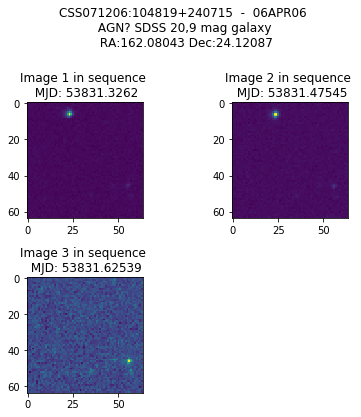

In [32]:
rows = int(len(exts)/2)
fig = plt.figure(figsize=(6,5*rows))
for i, ext in enumerate(exts):
    plt.subplot(rows+1,2,i+1)
    plt.imshow(np.log(fitsio.read(filename, ext=ext)))
    plt.title('Image {} in sequence \n MJD: {}'.format(obs[i], MJD[i]))
plt.suptitle('{}  -  {} \n {} \n RA:{} Dec:{}'.format(CRTS_ID, date,Class,RA,Dec), y=1.15)
plt.tight_layout()
plt.show()

In [33]:
df = pd.read_table('../tao_data/transient_info.txt')
CRTS_ID = np.array(df['#CRTS ID'])
CRTS_ID_object = 'CSS071206:104819+240715'


RA = np.array(df['RA (J2000)'])[CRTS_ID == CRTS_ID_object]
DEC = np.array(df['Dec (J2000)'])[CRTS_ID == CRTS_ID_object]
Mag = np.array(df['Mag'])[CRTS_ID == CRTS_ID_object]

print(RA,DEC,Mag)
# 150.130562444 	7.21319986445 

[162.08043] [24.12087] [19.92]


In [120]:
from astropy.io import fits
from astropy.wcs import WCS 
from astropy.coordinates import SkyCoord
import numpy as np

filename = '../tao_data/Complete/AGN/CSS071206:104819+240715/01_05APR01_N23054_0001_cutout_2918.fits'
hdul = fits.open(filename)

RAA  =  hdul[0].header['RA']
DECC  =  hdul[0].header['DEC']


print(RAA,DECC)
hdul[0].header

10:52:52.059 +23:59:06.89


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  120                                                  
NAXIS2  =                  120                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2005-04-01T05:10:49' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'CADDSV3.1'          / Catalina Sky Survey                            
INSTRUME= 'SI 600-277'         / instrument                                     
DATE-OBS= '2005-04-01'         / UT date at beginning of obs.                   
EXPTIME =                 30.0 / actual integration time                        
VACUUM  =                   

In [121]:
from astropy import units as u
c = SkyCoord(RAA, DECC, unit=(u.hourangle,u.deg))
ra = c.ra.degree
dec = c.dec.degree
print(RA,DEC)
print(ra,dec)

c = SkyCoord(RA, DEC, unit=(u.hourangle,u.deg))
ra = c.ra.degree
dec = c.dec.degree
print(ra,dec)

image_data = hdul[0].data
w = WCS(hdul[0].header)
x, y = w.wcs_world2pix(RA,DEC, 0)
print(x,y)
# x, y = w.all_world2pix(ra, dec, 0)

[162.08043] [24.12087]
163.21691249999998 23.985247222222224
[271.20645] [24.12087]
[66.04505274] [95.1714738]


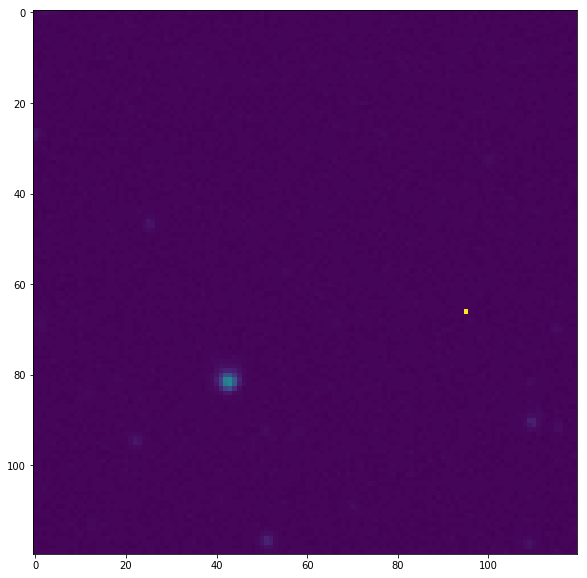

In [139]:
data = hdul[0].data.T
data[int(x),int(y)] = -100
# print(np.shape(data))
# data = data[0:64,0:64]
fig = plt.figure(figsize=(10,10))
plt.imshow(np.log10(data)+np.ones(len(data))*1000)
plt.show()

In [171]:
MAX_REJECT = 0.5
MIN_NPIXELS = 5
GOOD_PIXEL = 0
BAD_PIXEL = 1
KREJ = 2.5
MAX_ITERATIONS = 5


def zscale (image, nsamples=1000, contrast=0.25, bpmask=None, zmask=None):
    """Implement IRAF zscale algorithm

    Parameters
    ----------
    image : arr
        2-d numpy array

    nsamples : int (Default: 1000)
        Number of points in array to sample for determining scaling factors

    contrast : float (Default: 0.25)
        Scaling factor for determining min and max. Larger values increase the
        difference between min and max values used for display.

    bpmask : None
        Not used at this time

    zmask : None
        Not used at this time

    Returns
    -------
    (z1, z2)
    """

    # Sample the image
    samples = zsc_sample (image, nsamples, bpmask, zmask)
    npix = len(samples)
    samples.sort()
    zmin = samples[0]
    zmax = samples[-1]
    # For a zero-indexed array
    center_pixel = (npix - 1) // 2
    if npix%2 == 1:
        median = samples[center_pixel]
    else:
        median = 0.5 * (samples[center_pixel] + samples[center_pixel + 1])

    #
    # Fit a line to the sorted array of samples
    minpix = max(MIN_NPIXELS, int(npix * MAX_REJECT))
    ngrow = max (1, int (npix * 0.01))
    ngoodpix, zstart, zslope = zsc_fit_line (samples, npix, KREJ, ngrow,
                                             MAX_ITERATIONS)

    if ngoodpix < minpix:
        z1 = zmin
        z2 = zmax
    else:
        if contrast > 0: zslope = zslope / contrast
        z1 = max (zmin, median - (center_pixel - 1) * zslope)
        z2 = min (zmax, median + (npix - center_pixel) * zslope)
    return z1, z2

def zsc_sample (image, maxpix, bpmask=None, zmask=None):

    # Figure out which pixels to use for the zscale algorithm
    # Returns the 1-d array samples
    # Don't worry about the bad pixel mask or zmask for the moment
    nc = image.shape[0]
    nl = image.shape[1]
    stride = max (1.0, np.sqrt((nc - 1) * (nl - 1) / float(maxpix)))
    stride = int (stride)
    samples = image[::stride,::stride].flatten()

    # Remove invalid values for masked arrays
    if isinstance(samples, np.ma.MaskedArray):
        samples = samples.compressed()

    # Remove invalid values from ndarrays
    elif isinstance(samples, np.ndarray):
        samples = samples[np.isfinite(samples)]

    return samples[:maxpix]

def zsc_fit_line (samples, npix, krej, ngrow, maxiter):

    #
    # First re-map indices from -1.0 to 1.0
    xscale = 2.0 / (npix - 1)
    xnorm = np.arange(npix)
    xnorm = xnorm * xscale - 1.0

    ngoodpix = npix
    minpix = max (MIN_NPIXELS, int (npix*MAX_REJECT))
    last_ngoodpix = npix + 1

    # This is the mask used in k-sigma clipping.  0 is good, 1 is bad
    badpix = np.zeros(npix, dtype="int32")

    #
    #  Iterate
    for niter in range(maxiter):

        if (ngoodpix >= last_ngoodpix) or (ngoodpix < minpix):
            break

        # Accumulate sums to calculate straight line fit
        goodpixels = np.where(badpix == GOOD_PIXEL)
        sumx = xnorm[goodpixels].sum()
        sumxx = (xnorm[goodpixels]*xnorm[goodpixels]).sum()
        sumxy = (xnorm[goodpixels]*samples[goodpixels]).sum()
        sumy = samples[goodpixels].sum()
        sum = len(goodpixels[0])

        delta = sum * sumxx - sumx * sumx
        # Slope and intercept
        intercept = (sumxx * sumy - sumx * sumxy) / delta
        slope = (sum * sumxy - sumx * sumy) / delta

        # Subtract fitted line from the data array
        fitted = xnorm*slope + intercept
        flat = samples - fitted

        # Compute the k-sigma rejection threshold
        ngoodpix, mean, sigma = zsc_compute_sigma (flat, badpix, npix)

        threshold = sigma * krej

        # Detect and reject pixels further than k*sigma from the fitted line
        lcut = -threshold
        hcut = threshold
        below = np.where(flat < lcut)
        above = np.where(flat > hcut)

        badpix[below] = BAD_PIXEL
        badpix[above] = BAD_PIXEL

        # Convolve with a kernel of length ngrow
        kernel = np.ones(ngrow,dtype="int32")
        badpix = np.convolve(badpix, kernel, mode='same')

        ngoodpix = len(np.where(badpix == GOOD_PIXEL)[0])

        niter += 1

    # Transform the line coefficients back to the X range [0:npix-1]
    zstart = intercept - slope
    zslope = slope * xscale

    return ngoodpix, zstart, zslope

def zsc_compute_sigma (flat, badpix, npix):

    # Compute the rms deviation from the mean of a flattened array.
    # Ignore rejected pixels

    # Accumulate sum and sum of squares
    goodpixels = np.where(badpix == GOOD_PIXEL)
    sumz = flat[goodpixels].sum()
    sumsq = (flat[goodpixels]*flat[goodpixels]).sum()
    ngoodpix = len(goodpixels[0])
    if ngoodpix == 0:
        mean = None
        sigma = None
    elif ngoodpix == 1:
        mean = sumz
        sigma = None
    else:
        mean = sumz / ngoodpix
        temp = sumsq / (ngoodpix - 1) - sumz*sumz / (ngoodpix * (ngoodpix - 1))
        if temp < 0:
            sigma = 0.0
        else:
            sigma = np.sqrt (temp)

    return ngoodpix, mean, sigma


def concatenateImagesOneNeighbor(neigh, original_image, neigh_image, x_obj, y_obj):
    shape_neigh_image = list(np.shape(neigh_image))
    rows = shape_neigh_image[0]
    cols = shape_neigh_image[1]
    if neigh == 'D':
        collage = np.vstack([neigh_image, original_image])
        new_x = x_obj
        new_y = y_obj + rows
    elif neigh == 'U':
        collage = np.vstack([original_image, neigh_image])
        new_x = x_obj
        new_y = y_obj
    elif neigh == 'L':
        collage = np.hstack([neigh_image, original_image])
        new_x = x_obj + cols
        new_y = y_obj
    elif neigh == 'R':
        collage = np.hstack([original_image, neigh_image])
        new_x = x_obj 
        new_y = y_obj

    return collage, new_x, new_y


def concatenateImages3Neighbors(neigh, original_image, diag_image, horizontal_image, vertical_image, x_obj, y_obj):
    #define shapes
    shape_diag_image = list(np.shape(diag_image))
    shape_horizontal_image = list(np.shape(horizontal_image))
    shape_vertical_image = list(np.shape(vertical_image))
    #rows = shape_neigh_image[0]
    #cols = shape_neigh_image[1]
    if neigh == 'L-LD-D':
        row_1 = np.hstack([horizontal_image, original_image])
        row_2 = np.hstack([diag_image, vertical_image])
        collage = np.vstack([row_2, row_1])
        new_x = x_obj + shape_horizontal_image[1] #sumo lo de L
        new_y = y_obj + shape_vertical_image[0] #sumo lo de D
    elif neigh == 'L-LU-U':
        row_1 = np.hstack([diag_image, vertical_image])
        row_2 = np.hstack([horizontal_image, original_image])
        collage = np.vstack([row_2, row_1])
        new_x = x_obj + shape_horizontal_image[1] #sumo lo de L
        new_y = y_obj
    elif neigh == 'R-RD-D':
        row_1 = np.hstack([original_image, horizontal_image])
        row_2 = np.hstack([vertical_image, diag_image])
        collage = np.vstack([row_2, row_1])
        new_x = x_obj
        new_y = y_obj + shape_vertical_image[0] #sumo lo de D
    elif neigh == 'R-RU-U':
        row_1 = np.hstack([vertical_image, diag_image])
        row_2 = np.hstack([original_image, horizontal_image])
        collage = np.vstack([row_2, row_1])
        new_x = x_obj
        new_y = y_obj

    return collage, new_x, new_y



In [183]:
import utils
from astropy.visualization.mpl_normalize import ImageNormalize

data = hdul[0].data.T
data[int(x),int(y)] = 0
zmin, zmax = utils.zscale(data)
fig = plt.figure(figsize=(10,10))
plt.imshow(data, vmin=zmin, vmax=zmax)
plt.show()

NameError: name 'math' is not defined

../tao_data/Complete/AGN/CSS071206:104819+240715/01_05APR01_N23054_0001_cutout_2918.fits


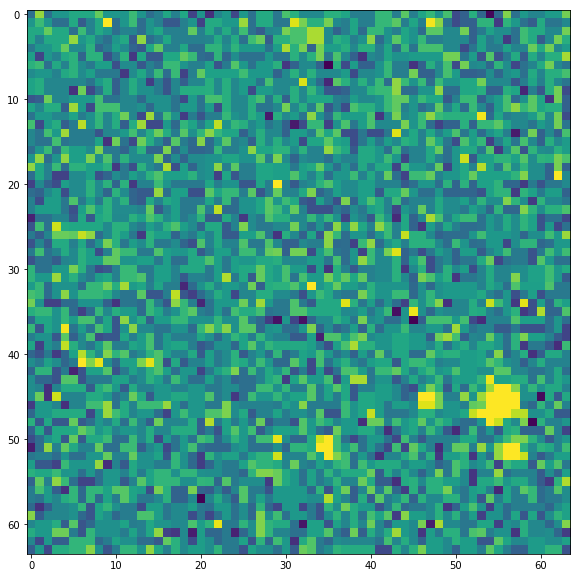

../tao_data/Complete/AGN/CSS071206:104819+240715/01_05APR17_N23054_0001_cutout_2918.fits


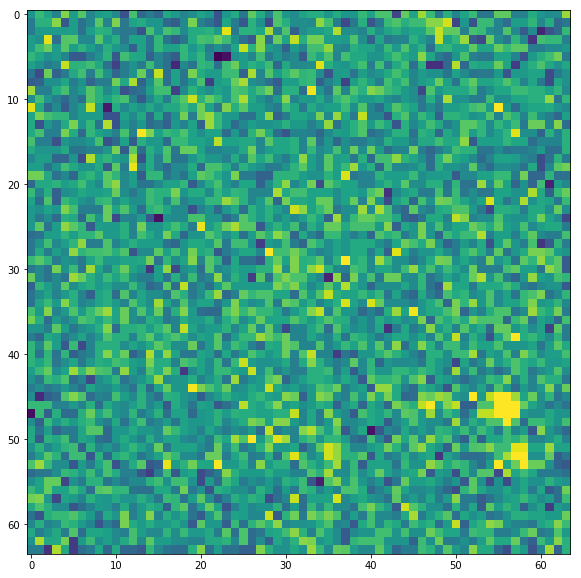

In [182]:
filename = '../tao_data/Complete/AGN/CSS071206:104819+240715/01_05APR01_N23054_0001_cutout_2918.fits'
print(filename)
data2 = np.load(filename[:-5]+'_ROI_all.npy')
fig = plt.figure(figsize=(10,10))
plt.imshow(data2, vmin=zscale(data2)[0], vmax=zscale(data2)[1])
plt.show()

filename = '../tao_data/Complete/AGN/CSS071206:104819+240715/01_05APR17_N23054_0001_cutout_2918.fits'
print(filename)
data2 = np.load(filename[:-5]+'_ROI_all.npy')
fig = plt.figure(figsize=(10,10))
plt.imshow(data2, vmin=zscale(data2)[0], vmax=zscale(data2)[1])
plt.show()

In [78]:
# HIERARCH RA (J2000) = 150.11888
# HIERARCH DEC (J2000) = 7.18778